In [1]:
import pandas as pd

In [2]:
import numpy as np

In [180]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [119]:
from sklearn.pipeline import Pipeline

In [173]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [10]:
DATA_PATH = 'data/Heart_failure_clinical_records_dataset.csv'

In [11]:
df = pd.read_csv(DATA_PATH)

In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
df.shape, df.columns.tolist()

((299, 13),
 ['age',
  'anaemia',
  'creatinine_phosphokinase',
  'diabetes',
  'ejection_fraction',
  'high_blood_pressure',
  'platelets',
  'serum_creatinine',
  'serum_sodium',
  'sex',
  'smoking',
  'time',
  'DEATH_EVENT'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
df.isna().sum().sort_values(ascending=False)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
target_col = 'DEATH_EVENT'

In [17]:
df[target_col].value_counts(dropna=False)

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [19]:
(df[target_col].value_counts(normalize=True) * 100).round(2)

DEATH_EVENT
0    67.89
1    32.11
Name: proportion, dtype: float64

In [20]:
num_cols = [c for c in df.columns if c!= target_col]

In [21]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.837237,11.900919,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>],
       [<Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>,
        <Axes: title={'center': 'serum_sodium'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>]], dtype=object)

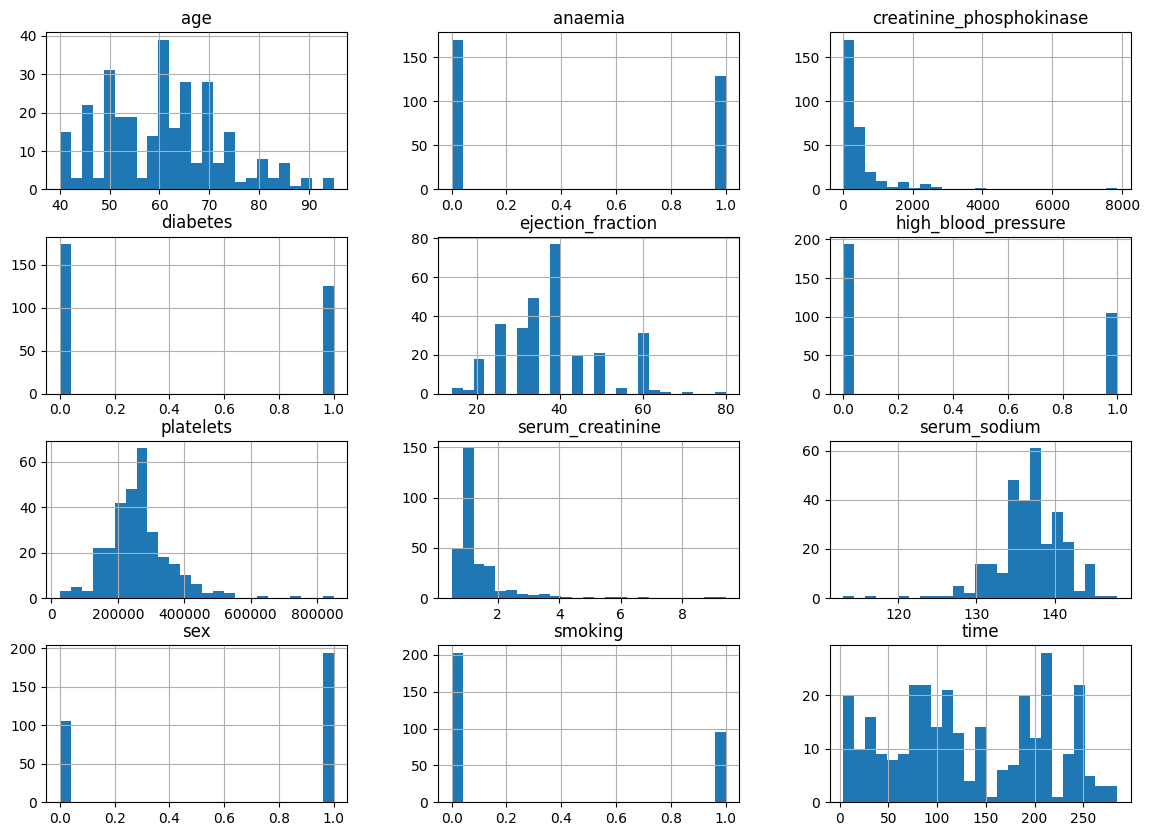

In [22]:
df[num_cols].hist(bins =25, figsize = (14,10))

In [27]:
group_stats = df.groupby(target_col)[num_cols].median().T

In [28]:
group_stats['diff'] = group_stats[1] - group_stats[0]

In [29]:
group_stats.sort_values('diff', ascending = False).head(10)

DEATH_EVENT,0,1,diff
creatinine_phosphokinase,245.0,259.0,14.0
age,60.0,65.0,5.0
serum_creatinine,1.0,1.3,0.3
anaemia,0.0,0.0,0.0
diabetes,0.0,0.0,0.0
high_blood_pressure,0.0,0.0,0.0
smoking,0.0,0.0,0.0
sex,1.0,1.0,0.0
serum_sodium,137.0,135.5,-1.5
ejection_fraction,38.0,30.0,-8.0


In [30]:
corr = df.corr(numeric_only = True)[target_col].sort_values(ascending=False)

In [31]:
corr

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.254008
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [32]:
df_fe = df.copy()

In [33]:
df_fe['age_group'] = pd.cut(
    df_fe['age'],
    bins = [0,50,60,200],
    labels = ['<50','50-60','60+'],
    right = False
)

In [34]:
df_fe['low_ejection_fraction'] = (df_fe['ejection_fraction'] < 35).astype(int)

In [35]:
df_fe['high_creatinine'] = (df_fe['serum_creatinine'] > 1.5 ).astype(int)

In [36]:
df_fe['low_sodium'] = (df_fe['serum_sodium'] < 135).astype(int)

In [37]:
df_fe['age_x_creatinine'] = df_fe['age'] * df_fe['serum_creatinine']

In [38]:
df_fe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,low_ejection_fraction,high_creatinine,low_sodium,age_x_creatinine
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,60+,1,1,1,142.5
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50-60,0,0,0,60.5
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60+,1,0,1,84.5
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50-60,1,1,0,95.0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60+,1,1,1,175.5


In [39]:
df_fe = pd.get_dummies(df_fe, columns = ['age_group'], drop_first = True)

In [40]:
df_fe.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,low_ejection_fraction,high_creatinine,low_sodium,age_x_creatinine,age_group_50-60,age_group_60+
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,1,1,142.5,False,True
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0,0,60.5,True,False
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1,0,1,84.5,False,True
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,1,1,0,95.0,True,False
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1,1,1,175.5,False,True


In [41]:
X = df_fe.drop(columns = [target_col])

In [42]:
y = df_fe[target_col]

In [46]:
X_train, X_test, y_train, y_test = train_test_split (
    X,y, test_size = 0.2, random_state = 42, stratify = y
)

In [47]:
X_train.shape, X_test.shape

((239, 18), (60, 18))

In [48]:
scaler = StandardScaler()

In [53]:
X_train_s = scaler.fit_transform(X_train)

In [54]:
X_test_s = scaler.transform(X_test)

In [55]:
lr = LogisticRegression(
    max_iter = 2000,
    class_weight = 'balanced',
    random_state = 42
    
)

In [58]:
lr.fit(X_train_s, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [59]:
pred = lr.predict(X_test_s)

In [60]:
proba = lr.predict_proba(X_test_s)[:,1]

In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



In [63]:
print('ROC_AUC', roc_auc_score(y_test,proba))

ROC_AUC 0.871630295250321


In [64]:
print('PR_AUC', average_precision_score(y_test,proba))

PR_AUC 0.7667477997533396


In [65]:
confusion_matrix(y_test,pred)

array([[35,  6],
       [ 7, 12]])

In [66]:
coef = pd.Series(lr.coef_[0], index=X.columns).sort_values()

In [67]:
coef.head(10), coef.tail(10)

(time                  -1.554458
 age_group_60+         -0.439230
 platelets             -0.225406
 ejection_fraction     -0.218210
 sex                   -0.202623
 age_group_50-60       -0.039975
 high_blood_pressure    0.036809
 serum_sodium           0.055775
 age_x_creatinine       0.125128
 anaemia                0.175980
 dtype: float64,
 age_x_creatinine            0.125128
 anaemia                     0.175980
 smoking                     0.221166
 low_sodium                  0.242633
 serum_creatinine            0.335080
 diabetes                    0.355093
 creatinine_phosphokinase    0.367534
 high_creatinine             0.537878
 age                         0.674782
 low_ejection_fraction       0.751441
 dtype: float64)

<Axes: >

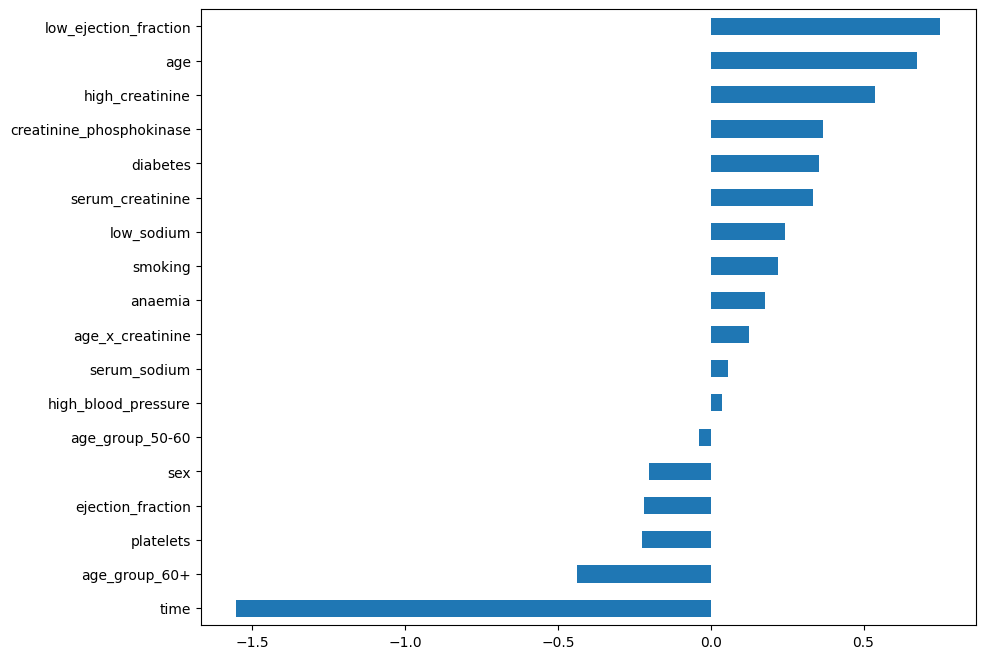

In [68]:
coef.sort_values().plot(kind = 'barh', figsize = (10,8))

In [69]:
features_without_time = [c for c in X.columns if c != 'time']

In [70]:
X_nt = df_fe[features_without_time]

In [71]:
y = df_fe[target_col]

In [72]:
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split (
    X_nt, y, test_size = 0.2, random_state = 42, stratify = y
)

In [73]:
scaler_nt = StandardScaler()

In [74]:
X_train_nt_s = scaler_nt.fit_transform(X_train_nt)

In [75]:
X_test_nt_s = scaler_nt.transform(X_test_nt)

In [80]:
lr_nt = LogisticRegression(
    solver = 'lbfgs',
    C = 0.5,
    max_iter = 3000,
    class_weight = 'balanced',
    random_state = 42
)

In [83]:
lr_nt.fit(X_train_nt_s, y_train_nt)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.5
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [84]:
pred_nt = lr_nt.predict(X_test_nt_s)

In [85]:
proba_nt = lr_nt.predict_proba(X_test_nt_s)[:, 1]

In [86]:
print(classification_report(y_test_nt, pred_nt))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.43      0.47      0.45        19

    accuracy                           0.63        60
   macro avg       0.59      0.59      0.59        60
weighted avg       0.64      0.63      0.64        60



In [88]:
print('ROC_AUC', roc_auc_score(y_test_nt,proba_nt))

ROC_AUC 0.7445442875481387


In [89]:
print('PR_AUC', average_precision_score(y_test_nt,proba_nt))

PR_AUC 0.6139804171804533


In [90]:
X_base = df.drop(columns = [target_col])

In [91]:
y = df[target_col]

In [93]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split (
    X_base, y, test_size = 0.2, random_state = 42, stratify = y
)

In [94]:
scaler_b = StandardScaler()

In [95]:
X_train_b_s = scaler_b.fit_transform(X_train_b)

In [96]:
X_test_b_s = scaler_b.transform(X_test_b)

In [97]:
lr_base = LogisticRegression(
    max_iter = 2000,
    class_weight = 'balanced',
    random_state = 42
)

In [98]:
lr_base.fit(X_train_b_s, y_train_b)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [99]:
proba_base = lr_base.predict_proba(X_test_b_s)[:, 1]

In [100]:
print('Baseline ROC_AUC:', roc_auc_score(y_test_b,proba_base))

Baseline ROC_AUC: 0.8549422336328627


In [102]:
print('Baseline PR-AUC:', average_precision_score(y_test_b,proba_base))

Baseline PR-AUC: 0.7414801186878519


In [103]:
###“Feature engineering improved PR-AUC by focusing the model on clinically meaningful risk indicators rather than raw measurements.”  ###

In [107]:
thresholds = [0.3, 0.4, 0.5, 0.6]

In [109]:
for t in thresholds:
    preds_t = (proba_nt >= t).astype(int)
    print(confusion_matrix(y_test_nt, preds_t))

[[25 16]
 [ 3 16]]
[[27 14]
 [ 6 13]]
[[29 12]
 [10  9]]
[[30 11]
 [10  9]]


In [110]:
coef_nt = pd.Series(
    lr_nt.coef_[0],
    index = features_without_time
).sort_values()

In [111]:
odds_ratio = np.exp(coef_nt)

In [112]:
odds_ratio.sort_values(ascending=False).head(10)

low_ejection_fraction       2.167316
age                         1.860658
high_creatinine             1.705862
creatinine_phosphokinase    1.485053
anaemia                     1.416339
smoking                     1.366831
diabetes                    1.357861
high_blood_pressure         1.355990
age_x_creatinine            1.269911
serum_creatinine            1.247745
dtype: float64

In [115]:
cv_scores = cross_val_score(
    lr_nt,
    scaler_nt.fit_transform(X_nt),
    y,
    cv=5,
    scoring = 'roc_auc'
)

In [117]:
cv_scores.mean(), cv_scores.std()

(np.float64(0.7686360718870346), np.float64(0.07573044743611201))

In [118]:
#### YORUMLAMA, STABİLİTE VE HATA DÜZELTME #####

In [120]:
target_col = 'DEATH_EVENT'

In [121]:
include_time = False

In [122]:
feature_cols = [c for c in df_fe.columns if c!= target_col]

In [124]:
if not include_time and 'time' in feature_cols:
    feature_cols.remove('time')

In [125]:
X = df_fe[feature_cols]

In [126]:
y = df_fe[target_col]

In [127]:
X_train, X_test, y_train, y_test = train_test_split (
    X,y, test_size = 0.2 , random_state = 42, stratify = y
)

In [128]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter = 5000,
        class_weight = 'balanced',
        solver = 'lbfgs',
        random_state = 42
    ))
])

In [129]:
pipe_lr.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [130]:
pred = pipe_lr.predict(X_test)

In [131]:
proba = pipe_lr.predict_proba(X_test)[:, 1]

In [132]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.43      0.47      0.45        19

    accuracy                           0.63        60
   macro avg       0.59      0.59      0.59        60
weighted avg       0.64      0.63      0.64        60



In [133]:
print('ROC_AUC:', roc_auc_score(y_test, proba))

ROC_AUC: 0.7406931964056483


In [134]:
print('PR_AUC:', average_precision_score(y_test, proba))

PR_AUC: 0.6055769851422808


In [136]:
print('Confusion Matrix:\n', confusion_matrix(y_test,pred))

Confusion Matrix:
 [[29 12]
 [10  9]]


In [141]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state= 42)

In [143]:
roc_scores = cross_val_score(pipe_lr,X,y, cv=cv, scoring='roc_auc')

In [147]:
pr_scores = cross_val_score(pipe_lr,X,y,cv=cv, scoring = 'average_precision')

In [145]:
print(f"CV ROC-AUC: mean = {roc_scores.mean(): .3f}, std = {roc_scores.std(): .3f}")

CV ROC-AUC: mean =  0.784, std =  0.062


In [151]:
print(f"PR-AUC: mean = {pr_scores.mean(): .3f}, std = {pr_scores.std(): .3f}")

PR-AUC: mean =  0.673, std =  0.072


In [152]:
lr_model = pipe_lr.named_steps['model']

In [153]:
scaler = pipe_lr.named_steps['scaler']

In [154]:
coef = pd.Series(lr_model.coef_[0], index = X.columns).sort_values(ascending = False)

In [155]:
odds_ratio = np.exp(coef)

In [156]:
summary_or = pd.DataFrame({
    'coef' : coef,
    'odds_ratio' : odds_ratio
}).sort_values('odds_ratio', ascending = False)

In [157]:
summary_or.head(10)

,coef,odds_ratio
low_ejection_fraction,0.830423,2.294289
age,0.701068,2.015905
high_creatinine,0.564505,1.758576
creatinine_phosphokinase,0.416020,1.515916
anaemia,0.367140,1.443601
smoking,0.342602,1.408608
diabetes,0.324055,1.382723
high_blood_pressure,0.319594,1.376568
serum_creatinine,0.250660,1.284874
age_x_creatinine,0.203062,1.225148


In [159]:
summary_or.sort_values('odds_ratio', ascending = True).head(10)

,coef,odds_ratio
age_group_60+,-0.427146,0.652368
platelets,-0.174217,0.840115
sex,-0.169167,0.844368
age_group_50-60,-0.084269,0.919184
serum_sodium,-0.025707,0.974620
ejection_fraction,0.013562,1.013654
low_sodium,0.172999,1.188865
age_x_creatinine,0.203062,1.225148
serum_creatinine,0.250660,1.284874
high_blood_pressure,0.319594,1.376568


In [166]:
def threshold_metrics(y_true, y_proba, thr):
    y_pred = (y_proba >= thr).astype(int)
    report = classification_report(y_true,y_pred,output_dict = True)
    return {
        'thresholds': thr,
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1' : report['1']['f1-score'],
        'support_1' : report['1']['support']
    }

In [167]:
thresholds = np.arange(0.1, 0.91, 0.1)

In [168]:
rows = [threshold_metrics(y_test,proba,t) for t in thresholds]

In [169]:
thr_df = pd.DataFrame(rows)

In [170]:
thr_df

,thresholds,precision_1,recall_1,f1_1,support_1
0,0.1,0.352941,0.947368,0.514286,19.0
1,0.2,0.485714,0.894737,0.629630,19.0
2,0.3,0.500000,0.842105,0.627451,19.0
3,0.4,0.500000,0.736842,0.595745,19.0
4,0.5,0.428571,0.473684,0.450000,19.0
5,0.6,0.450000,0.473684,0.461538,19.0
6,0.7,0.529412,0.473684,0.500000,19.0
7,0.8,0.625000,0.263158,0.370370,19.0
8,0.9,1.000000,0.157895,0.272727,19.0


In [171]:
thr_df.sort_values('recall_1', ascending=False).head(5)

,thresholds,precision_1,recall_1,f1_1,support_1
0,0.1,0.352941,0.947368,0.514286,19.0
1,0.2,0.485714,0.894737,0.629630,19.0
2,0.3,0.500000,0.842105,0.627451,19.0
3,0.4,0.500000,0.736842,0.595745,19.0
4,0.5,0.428571,0.473684,0.450000,19.0


In [172]:
thr_df.sort_values('precision_1', ascending= False).head(5)

,thresholds,precision_1,recall_1,f1_1,support_1
8,0.9,1.000000,0.157895,0.272727,19.0
7,0.8,0.625000,0.263158,0.370370,19.0
6,0.7,0.529412,0.473684,0.500000,19.0
3,0.4,0.500000,0.736842,0.595745,19.0
2,0.3,0.500000,0.842105,0.627451,19.0


In [174]:
fpr , tpr, _ = roc_curve(y_test,proba)

In [175]:
prec, rec, _ = precision_recall_curve(y_test, proba)

In [181]:
plt.figure(figsize = (6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

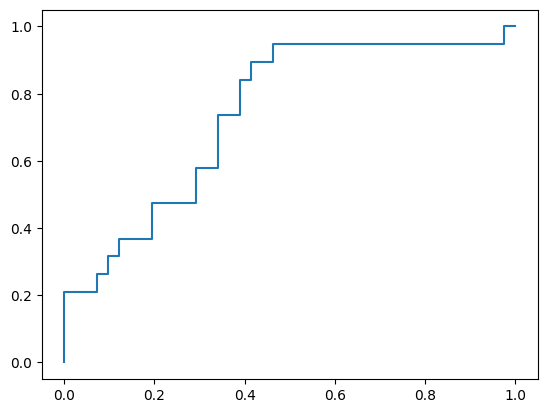

In [182]:
plt.plot(fpr,tpr)

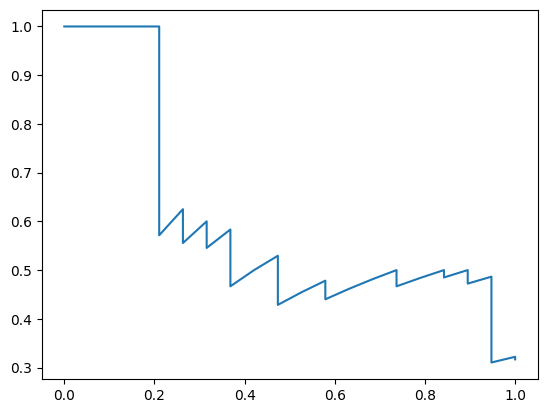

In [184]:
plt.plot(rec,prec)